# Lab | Feature extraction

## Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('/Users/Hector_Martin/Documents/Labs/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

## Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

## Setting the Column names into lowercase:

In [3]:
cols = []
for column in customer_df.columns:
    cols.append(column.lower())#fill in the list with all column names in lowercase
customer_df.columns = cols#replace the dataframe columns with the columns stored in the list

customer_df.head(5)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Replacing the space by an underscore

In [12]:
undersc = []
for column in customer_df.columns:
    undersc.append(column.replace(' ','_'))
customer_df.columns = undersc

customer_df.head(5)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Removing the 'customer' column. It does not add any value. 

In [11]:
customer_df = customer_df.drop(['customer'], axis =1)

### Change effective to date column to datetime format

In [13]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors = 'coerce')
customer_df.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      

## Let's split between numerical and categorical data:

In [14]:
customer_num = customer_df.select_dtypes(['number'])
customer_cat = customer_df.select_dtypes(['object']) 

### Plot all the categorical variables with the proper plot. What can you see?

In [7]:
def countplot(df):

    df2 = df.select_dtypes(include = object)
    for column in df2.columns:
        plt.subplots(figsize=(12,4))
        sns.countplot(x= column, data= df2, palette="Set2");
        plt.show()

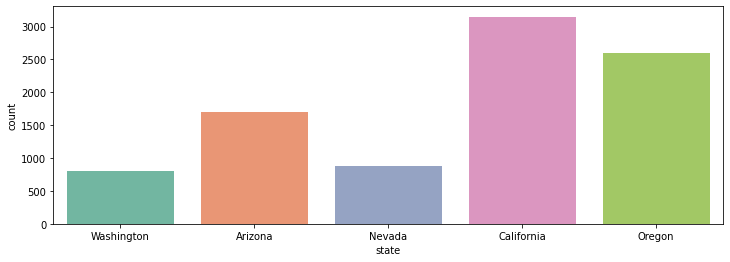

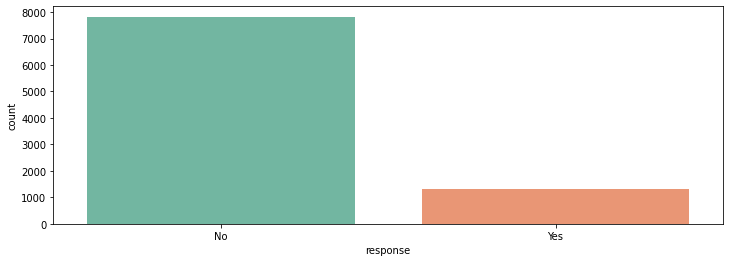

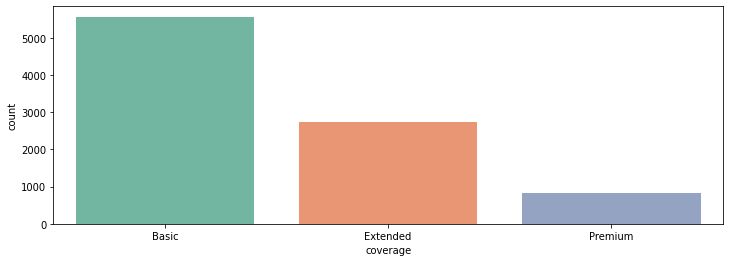

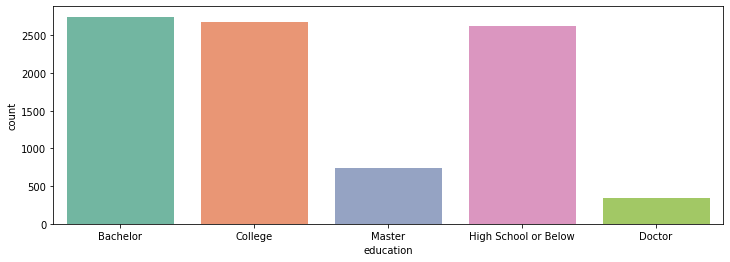

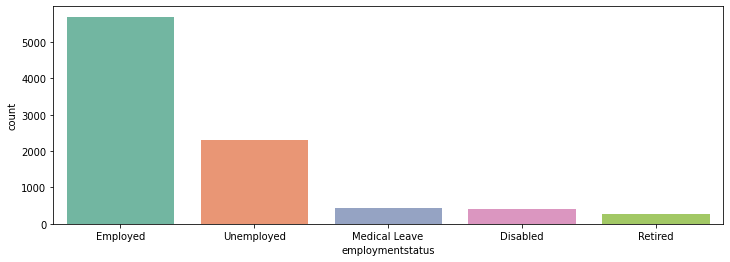

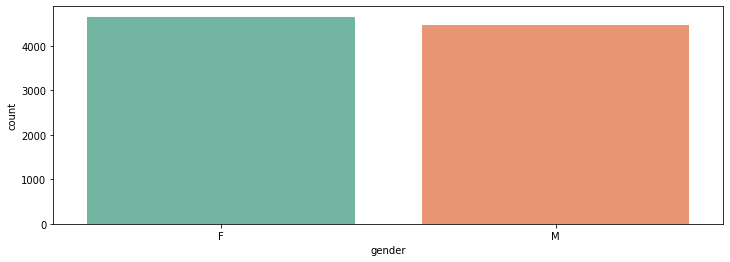

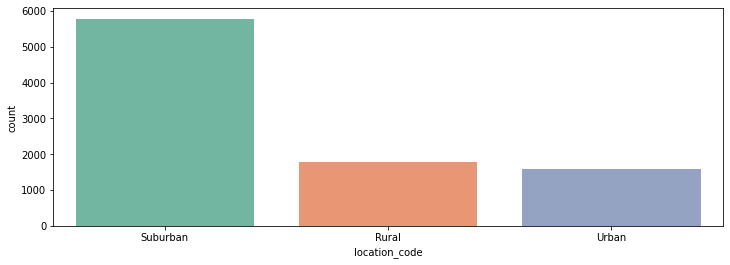

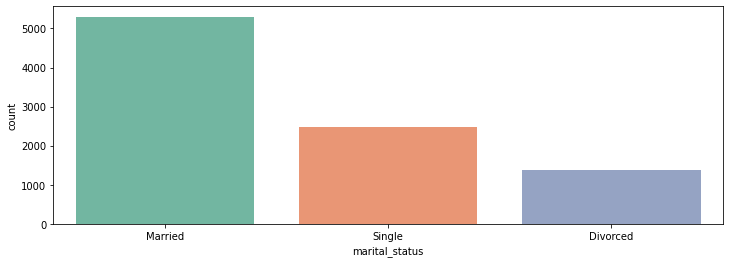

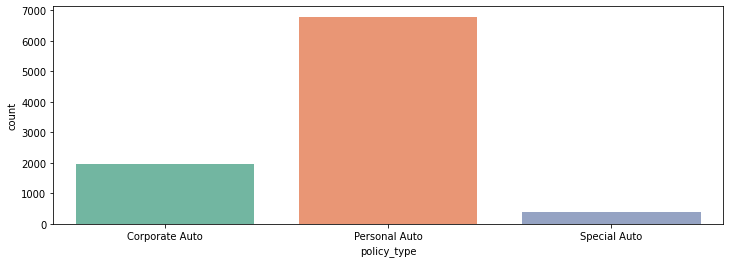

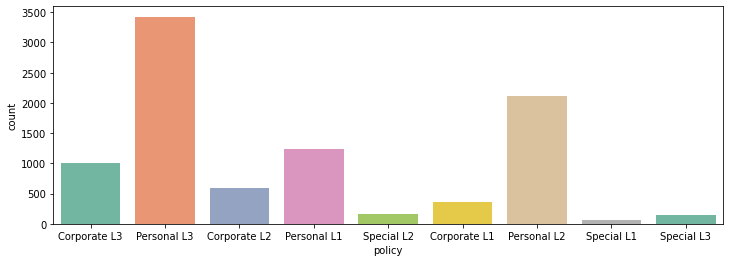

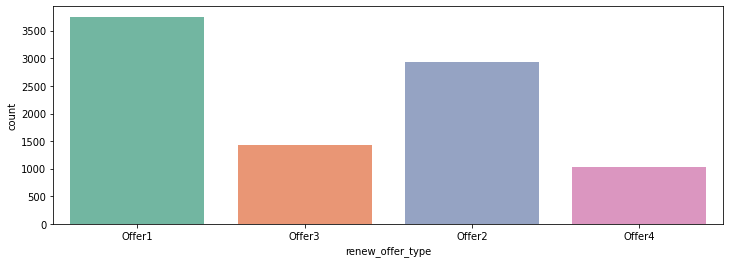

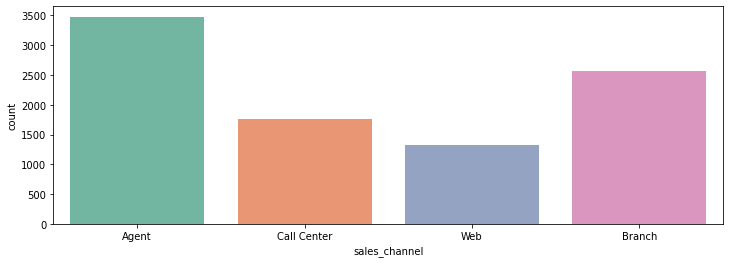

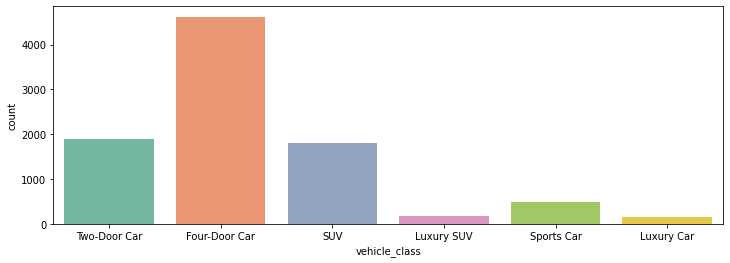

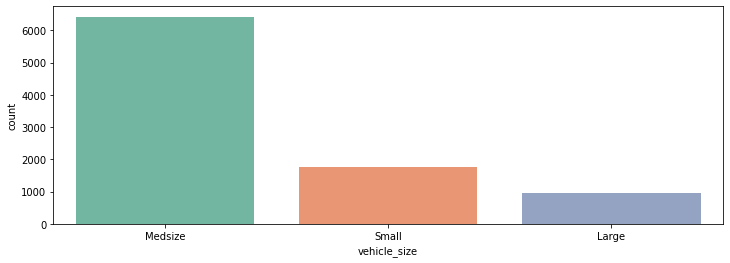

In [15]:
countplot(customer_cat)

### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [20]:
def check_na (df):
    for i in df.columns:
        print(i, df[i].value_counts(dropna = False))

In [22]:
check_na(customer_cat)

state California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
response No     7826
Yes    1308
Name: response, dtype: int64
coverage Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
education Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
employmentstatus Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
gender F    4658
M    4476
Name: gender, dtype: int64
location_code Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
marital_status Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
policy_type Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
policy

**Policy** and **policy_type** seem to be offering the same information, nonetheless policy seems to have an additional level of granularity dividing each type into 3 sublevels, therefore, I would remove **policy_type**.

#### Plot time variable. Can you extract something from it?

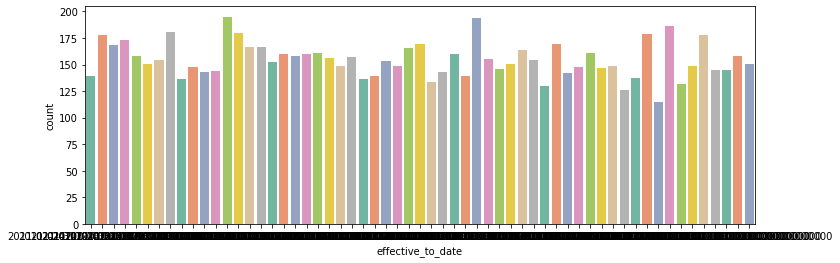

In [10]:
customer_df['effective_to_date']

plt.subplots(figsize=(12,4))
sns.countplot(x= 'effective_to_date', data= customer_df, palette="Set2");
plt.show()

Nothing can be seen due to the high amount of unique values. 

In order to get some valuable insights, we could extract the days of the week on the Effective to Date column, then make 2 groups between week days and weekend days if we wanted to observe how those may affect our predictions
we could do the same with months, seasons, if it was the case, but here I do not see the point apart
from removing this column.